In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

# Get MNIST DATA

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# MNIST Preprocess

In [5]:
# We will use train data for auto encoder training
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# Modeling

In [6]:
# MNISt input 28 rows * 28 columns = 784 pixels
input_img = Input(shape =(784, ))
# encoder
encoder1 = Dense(128, activation = 'sigmoid')(input_img)
encoder2 = Dense(3, activation = 'sigmoid')(encoder1)
# decoder
decoder1 = Dense(128, activation = 'sigmoid')(encoder2)
decoder2 = Dense(784, activation = 'sigmoid')(decoder1)

# this model maps an input to its reconstruction
autoencoder = Model(inputs = input_img, outputs = decoder2)

In [7]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train, epochs = 5, batch_size = 32, shuffle = True, validation_data = (x_test, x_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.2842 - val_loss: 0.2315
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2339 - val_loss: 0.2080
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2127 - val_loss: 0.1997
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2070 - val_loss: 0.1979
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2050 - val_loss: 0.1955


# Save and Load

In [9]:
autoencoder.save("AutoEncoder_tf.keras")

In [10]:
from tensorflow.keras.models import load_model
autoencoder = load_model("AutoEncoder_tf.keras")

# Analyze

In [11]:
# create encoder model
encoder = Model(inputs = input_img, outputs = encoder2)
# create decoder model
encoded_input = Input(shape=(3,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [12]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [13]:
print('자료형:', type(latent_vector))
print('벡터 개수:', len(latent_vector))
print('감소한 이미지 픽셀 수:', len(latent_vector[0]))
print('latent_vector 출력:\n', latent_vector)

자료형: <class 'numpy.ndarray'>
벡터 개수: 300
감소한 이미지 픽셀 수: 3
latent_vector 출력:
 [[0.9978752  0.49425498 0.21359666]
 [0.04504827 0.22897579 0.637749  ]
 [0.6560571  0.99905777 0.89229965]
 [0.15850155 0.17766163 0.21312588]
 [0.37781483 0.14189842 0.28831252]
 [0.66298914 0.9994531  0.7723147 ]
 [0.4747939  0.1533698  0.33137882]
 [0.40839157 0.09036084 0.4502033 ]
 [0.24137512 0.207934   0.16494313]
 [0.7863691  0.49989852 0.01128493]
 [0.08784873 0.13742046 0.22304069]
 [0.15497792 0.1347595  0.2696269 ]
 [0.796785   0.3827177  0.2008958 ]
 [0.1813813  0.12006208 0.24784264]
 [0.7678904  0.7927656  0.99967253]
 [0.1465891  0.12372155 0.41037887]
 [0.5557397  0.15077215 0.2922868 ]
 [0.92751396 0.2459087  0.35340464]
 [0.19851169 0.01479566 0.4531294 ]
 [0.5070235  0.24866448 0.32059994]
 [0.8791373  0.78082335 0.05908144]
 [0.21455501 0.18827665 0.3943267 ]
 [0.27777562 0.12395024 0.3200191 ]
 [0.2617612  0.44743034 0.20069803]
 [0.48123524 0.15957409 0.4059522 ]
 [0.07858868 0.13227749 0

In [14]:
print('자료형:', type(reconstructed_imgs))
print('벡터 개수:', len(reconstructed_imgs))
print('감소한 이미지 픽셀 수:', len(reconstructed_imgs[0]))
print('reconstructed_imgs 출력:\n', reconstructed_imgs)

자료형: <class 'numpy.ndarray'>
벡터 개수: 300
감소한 이미지 픽셀 수: 784
reconstructed_imgs 출력:
 [[1.0656988e-06 1.1718171e-06 1.3184922e-06 ... 1.4311646e-06
  1.0442136e-06 8.8230246e-07]
 [5.6466256e-06 5.0056951e-06 6.4085839e-06 ... 6.3720131e-06
  6.3158691e-06 4.7683352e-06]
 [1.5937557e-07 1.3524041e-07 1.7415965e-07 ... 1.6901329e-07
  1.6094037e-07 1.2433293e-07]
 ...
 [2.3921228e-05 2.3532617e-05 2.5878804e-05 ... 2.6914109e-05
  2.1817285e-05 1.8681956e-05]
 [1.2378669e-05 1.1708493e-05 1.3105405e-05 ... 1.3273461e-05
  1.1826245e-05 9.9816962e-06]
 [4.6153618e-06 4.3961290e-06 4.8768438e-06 ... 5.0643480e-06
  4.4641065e-06 3.8106141e-06]]


# MNIST 3D Visualization

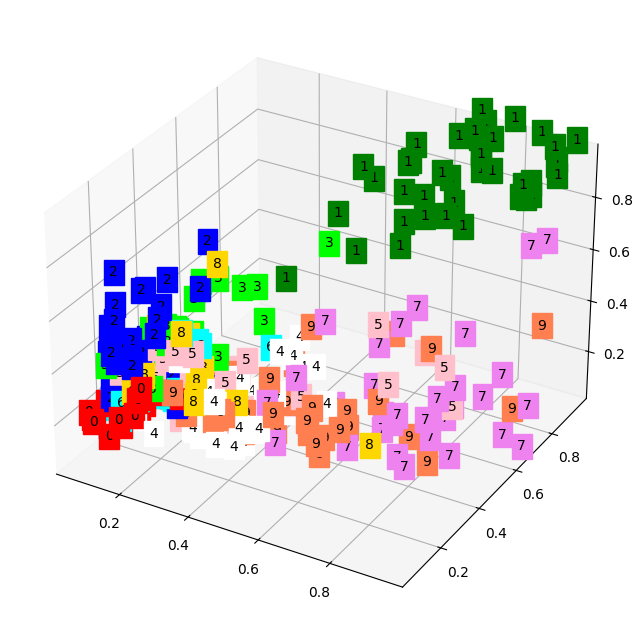

In [15]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

# Visualize Reconstructed Images

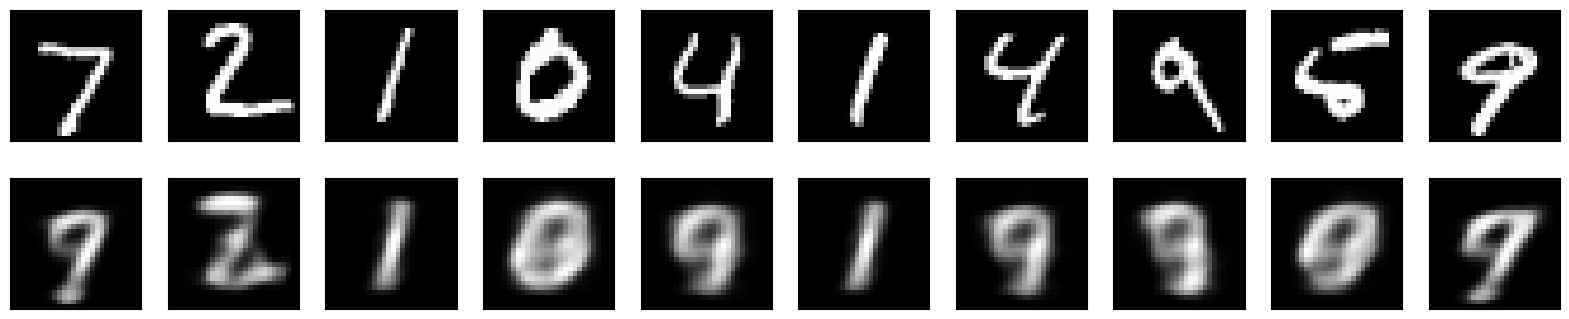

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize = (20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()